In [1]:
# Install a pip package in the current Jupyter kernel - https://jakevdp.github.io/blog/2017/12/05/installing-python-packages-from-jupyter/
import sys
!{sys.executable} -m pip install matplotlib numpy
sys.path.append('.')
import plotUtil


[notice] A new release of pip is available: 23.0 -> 23.2.1
[notice] To update, run: python3.10 -m pip install --upgrade pip


Plot the coverage of cells (above a threshold).

In [2]:
import json
#json_file_path = '/Users/bthj/QD/conf-duration_delta_pitch_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817612663.json'
# json_file_path = '/Users/bthj/QD/conf-static_mutation_rate_combinations/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_thrshld_0.5_1685817614609.json'
json_file_path = '/Users/bjornpjo/QD-Fox/conf-duration_delta_pitch_combinations-singleCellWin/evolution-run-analysis_qd-scores,cell-scores,coverage,elite-generations,genome-statistics,genome-sets,variance,elites-energy,goal-switches,lineage,duration-pitch-delta-velocity-combinations_step-1000_1693252236608.json'
x_multiplier = 1000  # Set this value as the step size in the JSON file name
# title as fourth path element from json_file_path
title = "coverage: " + json_file_path.split('/')[4]

# Read data from JSON file
data = plotUtil.read_data_from_json(json_file_path)

coverage_arrays = plotUtil.extract_data_arrays(data, 'coverage')

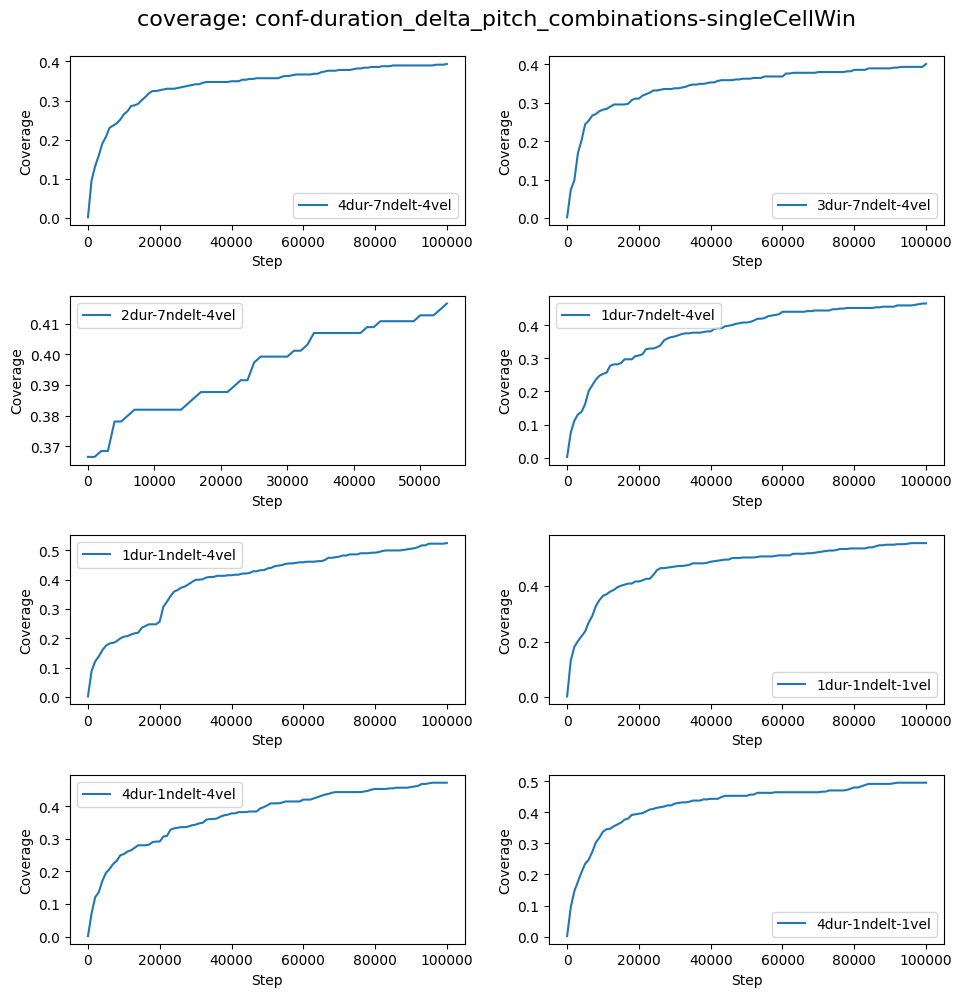

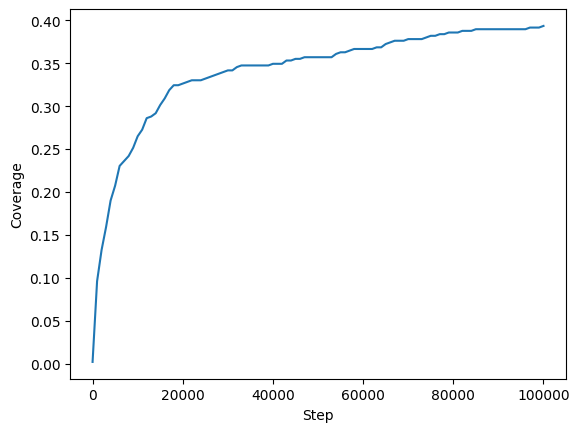

In [3]:
def coveragePlotFunc(plt, ax, x_values, array, arrayLabel):
    ax.plot(x_values, array, label=arrayLabel)
    ax.set_xlabel('Step')
    ax.set_ylabel('Coverage')
    ax.legend()

plotUtil.render_graphs(coverage_arrays, x_multiplier, coveragePlotFunc, 10, 10, title)



# Get the 1D coverage array from the JSON data at evoRuns[0].iterations[0].coverage
coverage = data['evoRuns'][0]['iterations'][0]['coverage']

# Plot the coverage as graph
import matplotlib.pyplot as plt
import numpy as np
plt.plot(np.arange(len(coverage)) * x_multiplier, coverage)
plt.xlabel('Step')
plt.ylabel('Coverage')
plt.show()

# Plot the coverage as a graph with a confidence interval
# - TODO: if there's data from multiple runs, plot the mean coverage and the confidence interval
# import matplotlib.pyplot as plt
# import numpy as np
# plt.plot(np.arange(len(coverage)) * x_multiplier, coverage)
# plt.xlabel('Step')
# plt.ylabel('Coverage')
# plt.fill_between(np.arange(len(coverage)) * x_multiplier, np.array(coverage) - np.array(data['evoRuns'][0]['iterations'][0]['coverageStd']), np.array(coverage) + np.array(data['evoRuns'][0]['iterations'][0]['coverageStd']), alpha=0.5)
# plt.show()

